# Quantum Gates in QISKit
Start by some typical setup and definition of useful functions, which you are encouraged to look at.

Then, head to the [exercises start](#Exercises-Start-Here) to start coding!

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

In [2]:
# Choose the drawer you like best:
from qiskit.tools.visualization import matplotlib_circuit_drawer as draw
#from qiskit.tools.visualization import circuit_drawer as draw

In [3]:
from qiskit import IBMQ
IBMQ.load_accounts() # make sure you have setup your token locally to use this

In [4]:
%matplotlib inline

## Utils for visualizing experimental results

In [5]:
import matplotlib.pyplot as plt

def show_results(D):
    # D is a dictionary with classical bits as keys and count as value
    # example: D = {'000': 497, '001': 527}
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()

## Utils for executing circuits

In [6]:
from qiskit import Aer
# See a list of available local simulators
print("Aer backends: ", Aer.backends())

Aer backends:  [<QasmSimulator('qasm_simulator') from Aer()>, <QasmSimulatorPy('qasm_simulator_py') from Aer()>, <StatevectorSimulator('statevector_simulator') from Aer()>, <StatevectorSimulatorPy('statevector_simulator_py') from Aer()>, <UnitarySimulator('unitary_simulator') from Aer()>, <CliffordSimulator('clifford_simulator') from Aer()>]


In [7]:
# see a list of available remote backends (these are freely given by IBM)
print("IBMQ Backends: ", IBMQ.backends())

IBMQ Backends:  [<IBMQBackend('ibmqx4') from IBMQ()>, <IBMQBackend('ibmqx5') from IBMQ()>, <IBMQBackend('ibmqx2') from IBMQ()>, <IBMQBackend('ibmq_16_melbourne') from IBMQ()>, <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]


### Execute locally

In [8]:
# execute circuit and either display a histogram of the results
def execute_locally(qc, draw_circuit=False):
    # Compile and run the Quantum circuit on a simulator backend
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(qc)
    
    # Print the results
    print("simulation: ", result_sim, result_counts)
    
    if draw_circuit: # draw the circuit
        draw(qc)
    else: # or show the results
        show_results(result_counts)

### Execute remotely

In [9]:
from qiskit.backends.ibmq import least_busy
import time
# Compile and run on a real device backend
def execute_remotely(qc, draw_circuit=False):
    if draw_circuit: # draw the circuit
        draw(qc)
    try:
        # select least busy available device and execute.
        least_busy_device = least_busy(IBMQ.backends(simulator=False))
        print("Running on current least busy device: ", least_busy_device)

        # running the job
        job_exp = execute(qc, backend=least_busy_device, shots=1024, max_credits=10)

        lapse, interval = 0, 10
        while job_exp.status().name != 'DONE':
            print('Status @ {} seconds'.format(interval * lapse))
            print(job_exp.status())
            time.sleep(interval)
            lapse += 1
        print(job_exp.status())
        exp_result = job_exp.result()
        result_counts = exp_result.get_counts(qc)

        # Show the results
        print("experiment: ", exp_result, result_counts)
        if not draw_circuit: # show the results
            show_results(result_counts)
    except:
        print("All devices are currently unavailable.")

---
<h1 align="center">Exercises Start Here</h1>

## Building the circuit

In [36]:
def new_circuit(size):
    # Create a Quantum Register with size qubits
    qr = QuantumRegister(size)

    # Create a Classical Register with size bits
    cr = ClassicalRegister(size)

    # Create a Quantum Circuit acting on the qr and cr register
    return qr, cr, QuantumCircuit(qr, cr)

## Adding Gates

### Hadamard
This gate is required to make superpositions.

**TASK:** Create a new circuit with 2 qubits using `new_circuit` (very useful to reconstruct your circuit in Jupyter)

In [77]:
qr, cr, circuit = new_circuit(2)

**TASK:** Add a Hadamard on the _least important_ qubit

In [78]:
# H gate on qubit 0
circuit.h(qr[0]);

**TASK:** Perform a measurement on that qubit to the first bit in the register

In [79]:
# measure the specific qubit
circuit.measure(qr[0], cr[0]); # ; hides the output

**TASK:** check the result using `execute_locally` test both `True` and `False` for the `draw_circuit` option

simulation:  COMPLETED {'00': 485, '01': 539}


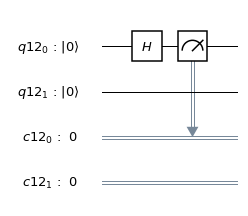

In [80]:
# Try both commands:
execute_locally(circuit,draw_circuit=True)
# execute_circuit(circuit,draw_circuit=False)

The result should be something like `COMPLETED {'00': 516, '01': 508}`.

**TASK:** What does this mean?

> That we got our superposition as expected, approximately 50% of the experiments yielded 0 and the other 50% yielded 1.

---
### X Gate (Pauli-X)
This gate is also referred to as a bit-flip.

**TASK:** Add an X gate on the 2nd qubit (index starts at 0) check the result

In [54]:
# X gate on qubit 1
circuit.x(qr[1]);

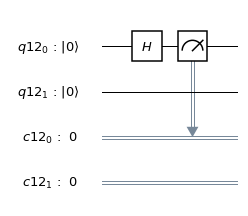

In [81]:
draw(circuit)

## Executing on a remote device
If you do this, you may have to wait for some time (usually a few minutes), depending on the current demand of the devices

**TASK:** Create a circuit that simply measures 5 qubits and run it on a remote device using `execute_remotely`!

In [82]:
execute_remotely(circuit)

All devices are currently unavailable.


**TASK:** Comment on the results

> 
**Important:** Once you get the results, you may see that, in fact, most of the iterations resulted in `00000`, but you will also see that there will be a few hits on other bit configurations (typically mostly composed of `0`s, like `00001` or `00010`) this is due to **experimental error** on the quantum device and is a concern to take into account when deploying into real devices!!